# Exploratory Data Analysis: Clean Data

In [ ]:
pip install geopy

In [ ]:
pip install geopandas

In [ ]:
pip install folium

In [1]:
import pandas as pd
from geopy.geocoders import ArcGIS
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from shapely.geometry import Point
import scipy.stats as stats
import statistics

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Loading Data

In [55]:
df = pd.read_csv('/content/clean_data_fix.csv')
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Kondisi Perabotan
0,0,0,0,RUMAH 2 LANTAI TENGAH KOTA PERUMAHAN BUKIT DAM...,1500.0,Balikpapan Selatan,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,5.0,3.0,144,207,SHM - Sertifikat Hak Milik,4400,Semi Furnished
1,1,1,1,Rumah Luas Lokasi Strategis di Gunung Samarind...,3100.0,Balikpapan Utara,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,534,200,SHM - Sertifikat Hak Milik,2200,Unknown
2,2,2,2,Rumah Minimalis Baru Renovasi Untuk Keluarga M...,600.0,Balikpapan Utara,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,2.0,2.0,80,140,SHM - Sertifikat Hak Milik,1300,Semi Furnished
3,3,3,3,"DIJUAL CEPAT RUMAH DI JALAN SWADAYA, KARANG RE...",510.0,Balikpapan Tengah,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,3.0,2.0,201,150,SHM - Sertifikat Hak Milik,1300,Unfurnished
4,4,4,4,Rumah Minimalis Modern Smart Home Tanah Luas,850.0,Balikpapan Utara,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,3.0,120,65,SHM - Sertifikat Hak Milik,2200,Unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1305,1445,1385,"PERUMAHAN NORDVILE GRAND CITY Seharga Rp 1,76 ...",1760.0,Balikpapan Utara,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,3.0,2.0,88,105,SHM - Sertifikat Hak Milik,2200,Unknown
1287,1306,1446,1386,PERUMAHAN PRIMARY GRAND CITY NORDVILE Seharga ...,3260.0,Balikpapan Utara,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,4.0,3.0,200,172,SHM - Sertifikat Hak Milik,2200,Unknown
1288,1307,1447,1429,RUMAH LUAS DUA LANTAI DI BOULEVARD PERUMAHAN E...,1800.0,Balikpapan Utara,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,3.0,2.0,200,200,SHM - Sertifikat Hak Milik,2200,NaN
1289,1308,1448,1442,RUMAH MEWAH FULLY FURNISH DI BALIKPAPAN BARU(Y...,8500.0,Balikpapan Baru,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,4.0,2.0,520,380,SHM - Sertifikat Hak Milik,6600,Unknown


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.2       1291 non-null   int64  
 1   Unnamed: 0.1       1291 non-null   int64  
 2   Unnamed: 0         1291 non-null   int64  
 3   Judul              1291 non-null   object 
 4   Harga              1291 non-null   float64
 5   Lokasi             1291 non-null   object 
 6   Hyperlink          1291 non-null   object 
 7   Img_Hyperlink      1291 non-null   object 
 8   Kamar Tidur        1291 non-null   float64
 9   Kamar Mandi        1291 non-null   float64
 10  Luas Tanah         1291 non-null   int64  
 11  Luas Bangunan      1291 non-null   int64  
 12  Sertifikat         1291 non-null   object 
 13  Daya Listrik       1291 non-null   int64  
 14  Kondisi Perabotan  1163 non-null   object 
dtypes: float64(3), int64(6), object(6)
memory usage: 151.4+ KB


In [57]:
# Extracts complete address data
def extract_last_two(loc):
    parts = loc.split(', ')
    return ', '.join(parts[-2:])
df['Lokasi'] = df['Lokasi'].apply(extract_last_two)

In [58]:
# Splitting the dataframe into several parts before latitude and longitude data extraction
dfs = []
for i in range(5):
    dfs.append(df.iloc[i*433 : (i+1)*433])
# Last dataframe gets the remaining rows
dfs.append(df.iloc[5*433:])

In [59]:
# Using python geocoders to get latitude and longitude data
def get_lat_lon(location):
    nom = ArcGIS(timeout=10)
    geo = nom.geocode(location)
    if geo:  # check if location was found
        return geo.latitude, geo.longitude
    else:  # return None if location not found
        return None, None

In [63]:
# Obtain latitude and longitude data from dataframe part 1
# (total extract time reaches around 10 minutes)
dfs[0]['latitude'], dfs[0]['longitude'] = zip(*dfs[0]['Lokasi'].apply(get_lat_lon))

<ipython-input-63-d27e13d2b0ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[0]['latitude'], dfs[0]['longitude'] = zip(*dfs[0]['Lokasi'].apply(get_lat_lon))
<ipython-input-63-d27e13d2b0ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[0]['latitude'], dfs[0]['longitude'] = zip(*dfs[0]['Lokasi'].apply(get_lat_lon))


In [64]:
# Obtain latitude and longitude data from dataframe part 2
dfs[1]['latitude'], dfs[1]['longitude'] = zip(*dfs[1]['Lokasi'].apply(get_lat_lon))

<ipython-input-64-073421ed3b68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[1]['latitude'], dfs[1]['longitude'] = zip(*dfs[1]['Lokasi'].apply(get_lat_lon))
<ipython-input-64-073421ed3b68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[1]['latitude'], dfs[1]['longitude'] = zip(*dfs[1]['Lokasi'].apply(get_lat_lon))


In [65]:
# Obtain latitude and longitude data from dataframe part 3
dfs[2]['latitude'], dfs[2]['longitude'] = zip(*dfs[2]['Lokasi'].apply(get_lat_lon))

<ipython-input-65-f028fc510118>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[2]['latitude'], dfs[2]['longitude'] = zip(*dfs[2]['Lokasi'].apply(get_lat_lon))
<ipython-input-65-f028fc510118>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[2]['latitude'], dfs[2]['longitude'] = zip(*dfs[2]['Lokasi'].apply(get_lat_lon))


In [66]:
# Recombine data
dfs = [dfs[0], dfs[1], dfs[2], dfs[3]]
df = pd.concat(dfs, ignore_index=True)

In [119]:
# Visualization to segment House Price based on Geography Districts
# Convert dataframe to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
# Read file using Geopandas
gdf = gpd.GeoDataFrame(df, geometry=geometry)
# Add "Region " prefix to each name in the 'region' column
gdf['Lokasi'].apply(lambda x: 'Lokasi ' + x)
# Read shape file using Geopandas
shp_data = gpd.read_file('idn_admbnda_adm3_bps_20200401.shp')
# For the point dataset:
gdf.crs = "EPSG:4326"
# For the sub-districts dataset:
shp_data.crs = "EPSG:4326"
avg_price = gdf.groupby('Lokasi')['Harga'].mean().reset_index()
# merged_data = shp_data.merge(avg_price.set_index('Lokasi'), left_index=True, right_index=True)
merged_data = shp_data.merge(avg_price, left_on="ADM3_EN", right_on="Lokasi")
merged_data = merged_data.rename(columns={'Harga': 'Average_Price'})
fig = px.choropleth(
    merged_data,
    geojson=merged_data.geometry,
    locations=merged_data.index,
    color='Average_Price',
    hover_name='ADM3_EN',
    hover_data=['Average_Price'],
    color_continuous_scale='YlGn',
    title='Average House Prices per District in Balikpapan'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(width=1000, height=800)
fig.show()

In [118]:
merged_data

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Lokasi,Average_Price
0,0.741918,0.017615,Balikpapan Barat,ID6471050,None,None,None,Kota Balikpapan,ID6471,Kalimantan Timur,ID64,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((116.78115 -1.03949, 116.78140 -1.039...",Balikpapan Barat,2027.500000
1,0.257732,0.000943,Balikpapan Kota,ID6471011,None,None,None,Kota Balikpapan,ID6471,Kalimantan Timur,ID64,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((116.85652 -1.25193, 116.85731 -1.252...",Balikpapan Kota,2439.392857
2,0.287142,0.002937,Balikpapan Selatan,ID6471010,None,None,None,Kota Balikpapan,ID6471,Kalimantan Timur,ID64,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((116.90698 -1.22198, 116.90675 -1.222...",Balikpapan Selatan,2016.290780
3,0.202410,0.000912,Balikpapan Tengah,ID6471040,None,None,None,Kota Balikpapan,ID6471,Kalimantan Timur,ID64,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((116.84332 -1.23864, 116.84363 -1.238...",Balikpapan Tengah,1894.230769
4,0.455113,0.010223,Balikpapan Timur,ID6471020,None,None,None,Kota Balikpapan,ID6471,Kalimantan Timur,ID64,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((116.92911 -1.10605, 116.93405 -1.108...",Balikpapan Timur,1382.366667
5,0.579249,0.011430,Balikpapan Utara,ID6471030,None,None,None,Kota Balikpapan,ID6471,Kalimantan Timur,ID64,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((116.89673 -1.06262, 116.89745 -1.063...",Balikpapan Utara,1541.016173


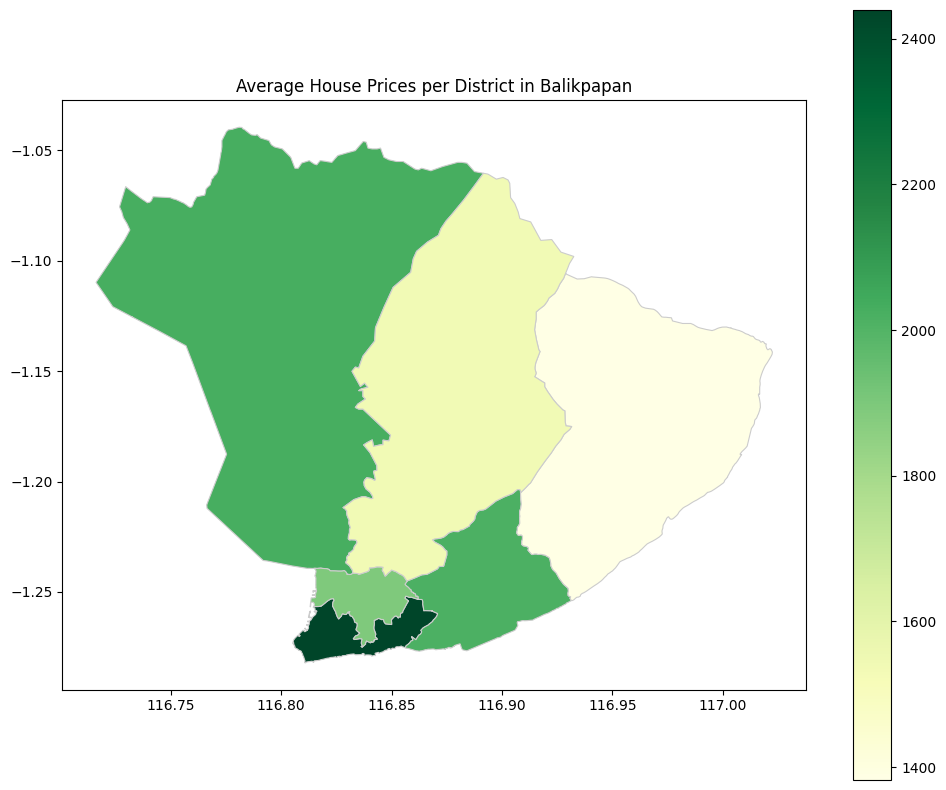

In [117]:
import matplotlib.pyplot as plt

# More simplified Visualization (Visualization without using an interactive basis)
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))
# Plot the Choropleth map
merged_data.plot(column='Average_Price', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set the aspect ratio explicitly (adjust as needed)
ax.set_aspect(1)

# Set the title
ax.set_title('Average House Prices per District in Balikpapan')

# Display the plot
plt.show()


Insight:
1. The Balikpapan city area exhibits the highest house prices compared to other regions, boasting an estimated average house price of IDR 2.4 billion. This can be attributed to its central location, making it unsurprising that the housing prices in this area rank among the most expensive.

2. Conversely, the East Balikpapan area displays the lowest house prices based on the provided data, with an estimated average price of IDR 1.3 billion. This disparity may be linked to the East Balikpapan area's distance from the city center.

In [120]:
# Separating Numerical and Categorical Columns
num_columns = df.select_dtypes(include=['int', 'float']).columns
cat_columns = df.select_dtypes(include=['object']).columns



In [121]:
num_columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Harga', 'Kamar Tidur',
       'Kamar Mandi', 'Luas Tanah', 'Luas Bangunan', 'Daya Listrik',
       'latitude', 'longitude'],
      dtype='object')

In [122]:
cat_columns

Index(['Judul', 'Lokasi', 'Hyperlink', 'Img_Hyperlink', 'Sertifikat',
       'Kondisi Perabotan'],
      dtype='object')

# Visualization Numerical & Categorical data

In [155]:
# make numerical plotter
def diagnostic_plots(df1, variable):
    # Print skew value
    print(f'Skewness value of {variable}: {df1[variable].skew()}')
    # Print Mean and Std dev
    print(f'Mean value of {variable} is {statistics.mean(df1[variable])}')
     # Print IQR Outlier
    q3, q1 = np.percentile(df1[variable], [75, 25])
    iqr = q3 - q1
    print(f'First Quartile is {q1}, Third Quartile is {q3}, IQR is {iqr}, and 3xIQR is {3*iqr}')
    print(f'Outliers will be removed are those below {q1-(3*iqr)} and higher than {q3+(3*iqr)}')


    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df1[variable], bins=30)
    plt.title(f'Histogram of {variable}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df1[variable])
    plt.title(f'Boxplot of {variable}')

    plt.show()

Skewness value of Harga: 4.686729178979409
Mean value of Harga is 1981.2494190549962
First Quartile is 850.0, Third Quartile is 2400.0, IQR is 1550.0, and 3xIQR is 4650.0
Outliers will be removed are those below -3800.0 and higher than 7050.0


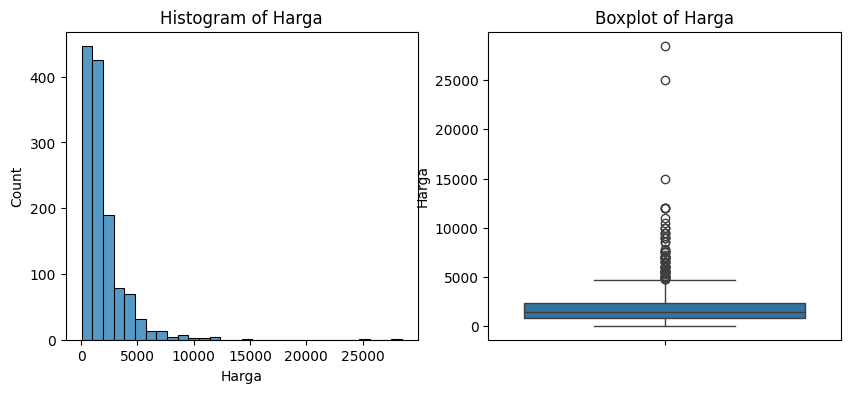

Skewness value of Kamar Tidur: 4.256533674101102
Mean value of Kamar Tidur is 3.4430673896204493
First Quartile is 2.0, Third Quartile is 4.0, IQR is 2.0, and 3xIQR is 6.0
Outliers will be removed are those below -4.0 and higher than 10.0


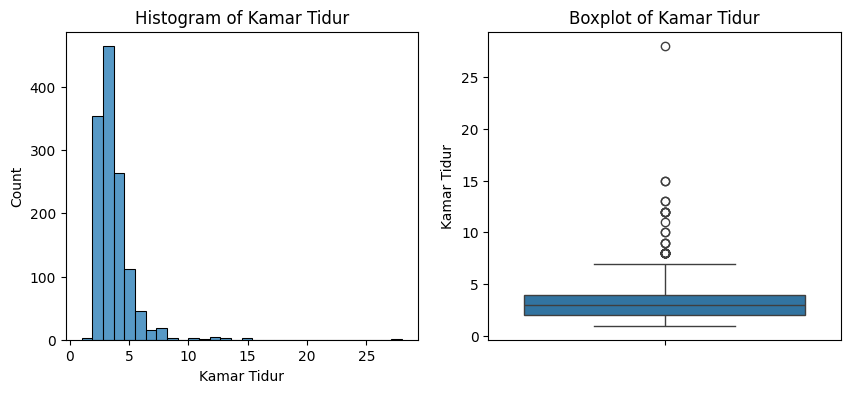

Skewness value of Kamar Mandi: 28.354600268805708
Mean value of Kamar Mandi is 2.4732765298218435
First Quartile is 2.0, Third Quartile is 3.0, IQR is 1.0, and 3xIQR is 3.0
Outliers will be removed are those below -1.0 and higher than 6.0


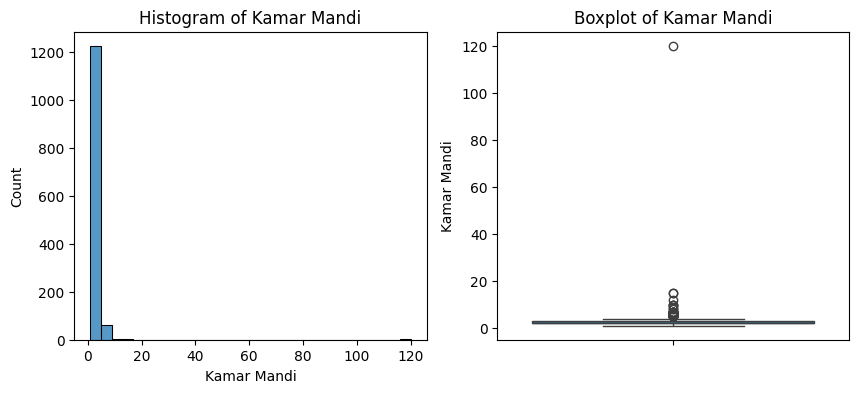

Skewness value of Luas Tanah: 2.774100560854888
Mean value of Luas Tanah is 212.84198295894655
First Quartile is 120.0, Third Quartile is 240.5, IQR is 120.5, and 3xIQR is 361.5
Outliers will be removed are those below -241.5 and higher than 602.0


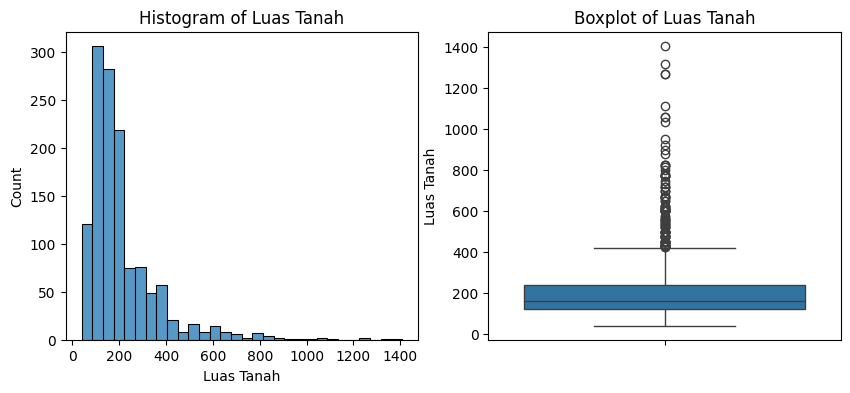

Skewness value of Luas Bangunan: 3.6223875797883203
Mean value of Luas Bangunan is 166.81099922540668
First Quartile is 80.0, Third Quartile is 207.0, IQR is 127.0, and 3xIQR is 381.0
Outliers will be removed are those below -301.0 and higher than 588.0


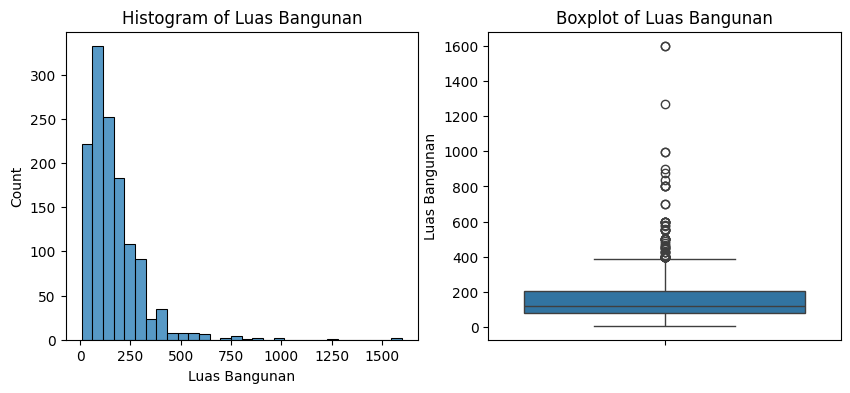

Skewness value of Daya Listrik: 3.5941290910567663
Mean value of Daya Listrik is 2781.409759876065
First Quartile is 1300.0, Third Quartile is 3500.0, IQR is 2200.0, and 3xIQR is 6600.0
Outliers will be removed are those below -5300.0 and higher than 10100.0


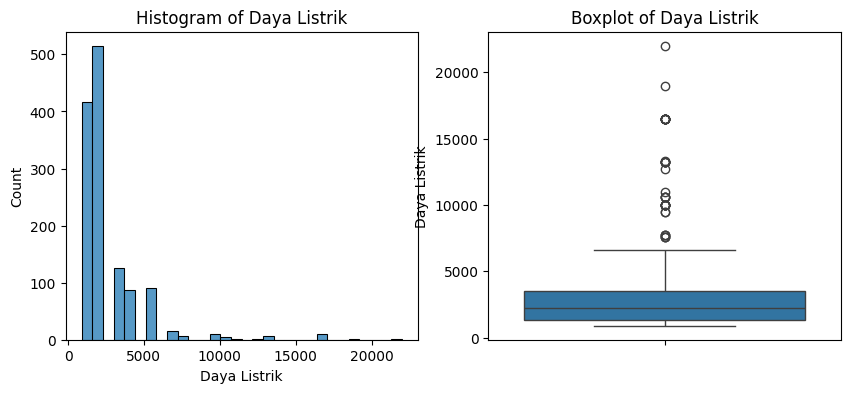

In [156]:
diagnostic_plots(df, 'Harga')
diagnostic_plots(df, 'Kamar Tidur')
diagnostic_plots(df, 'Kamar Mandi')
diagnostic_plots(df, 'Luas Tanah')
diagnostic_plots(df, 'Luas Bangunan')
diagnostic_plots(df, 'Daya Listrik')

**Insight** :

1. Harga :

    - The distribution is highly right-skewed (skewness: 4.658), indicating a concentration of lower prices.
    - There are potential outliers both below and above the thresholds (-3845.0 and 7110.0).

2. Kamar Tidur :

    - The distribution is right-skewed (skewness: 4.25), suggesting a concentration of fewer bedrooms.
    - There are potential outliers both below and above the thresholds (-4.0 and 10.0).

3. Kamar Mandi :

    - The distribution is highly right-skewed (skewness: 28.35), indicating a concentration of fewer bathrooms.
    - There are potential outliers both below and above the thresholds (-1.0 and 6.0).

4. Luas Tanah :

    - The distribution is highly right-skewed (skewness: 2.77), suggesting a concentration of smaller land areas.
    - There are potential outliers both below and above the thresholds (-269.25 and 639.0).

5. Luas Bangunan :

    - The distribution is right-skewed (skewness: 3.62), indicating a concentration of smaller building areas.
    - There are potential outliers both below and above the thresholds (-306.0 and 597.0).

6. Daya Listrik :

    - The distribution is right-skewed (skewness: 3.59), indicating a concentration of smaller building areas.
    - There are potential outliers both below and above the thresholds (-530.0 and 101.0).


# Visualization Categorical column

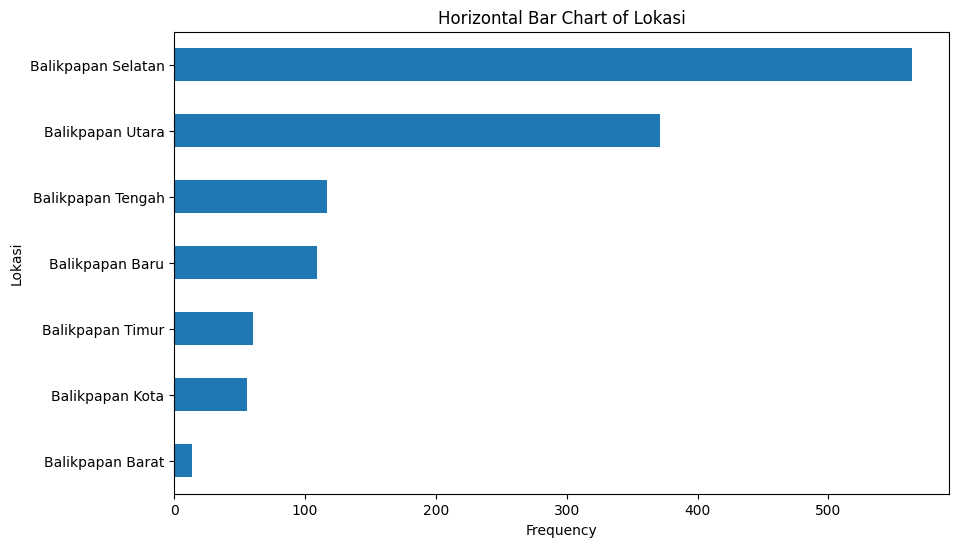

In [138]:
plt.figure(figsize=(10,6))
df['Lokasi'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Horizontal Bar Chart of Lokasi')
plt.xlabel('Frequency')
plt.ylabel('Lokasi')
plt.show()

**Insight** : From the bar chart, most of house locations are in the South Balikpapan area

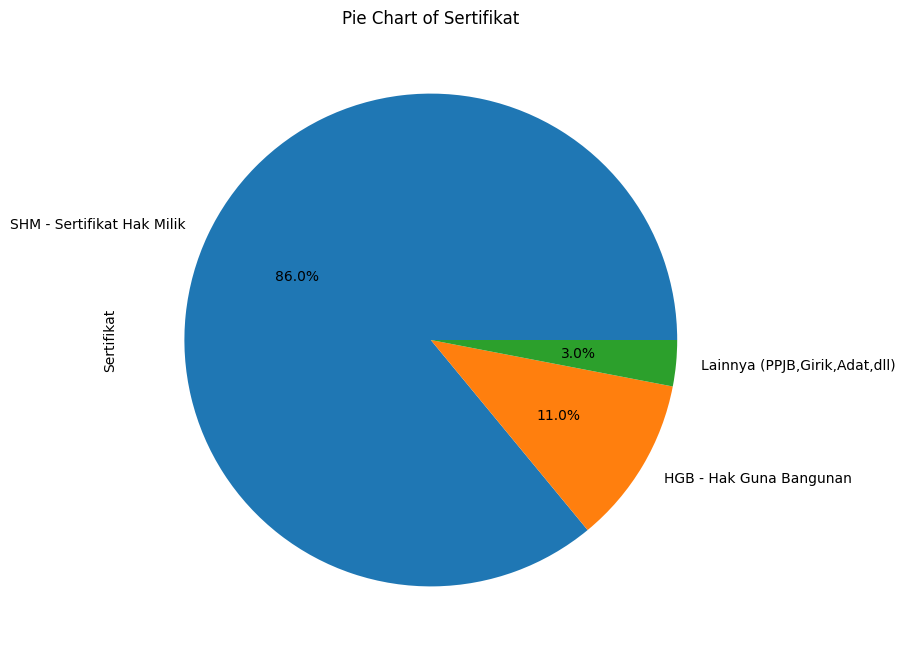

In [134]:
# Plot a pie chart
plt.figure(figsize=(10, 8))
df['Sertifikat'].value_counts().plot(kind='pie', autopct="%.1f%%")
plt.title('Pie Chart of Sertifikat')
plt.show()


**Insight** : From 3 type of sertifikat, the Sertifikat Hak Milik is have 86% distibution thus making it the most common type of certificate in home sales

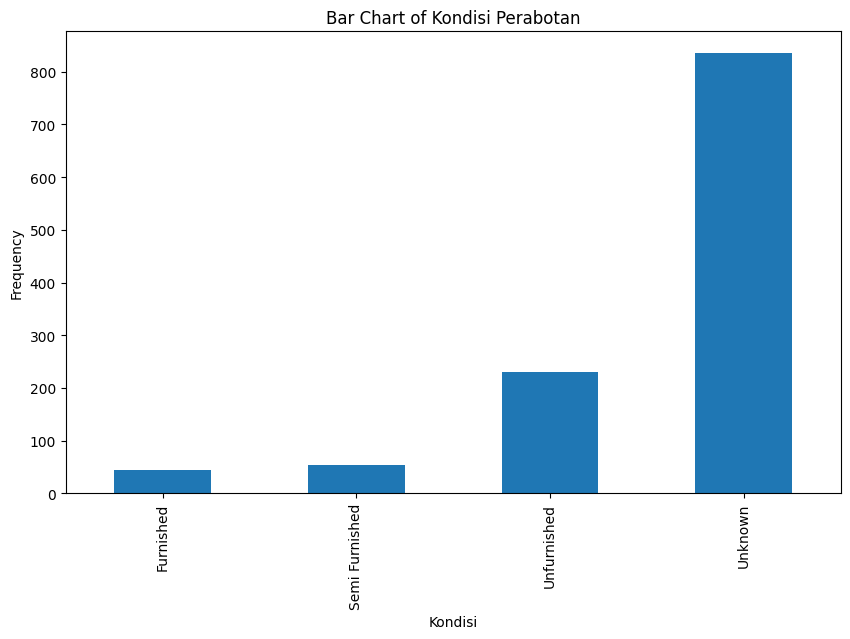

In [139]:
# Plot a vertical bar chart
plt.figure(figsize=(10, 6))
df['Kondisi Perabotan'].value_counts().sort_values(ascending=True).plot(kind='bar')
plt.title('Bar Chart of Kondisi Perabotan')
plt.xlabel('Kondisi')
plt.ylabel('Frequency')
plt.show()

Insight : Most kondisi perabotan is unknown, it is because most of the seller did not fill the data

# Check Linear Relationship

In [148]:
data = df.drop(['Unnamed: 0.1', 'Unnamed: 0','Unnamed: 0.2', 'Judul', 'Lokasi', 'Hyperlink' , 'Img_Hyperlink', 'Sertifikat', 'Kondisi Perabotan', 'latitude', 'longitude'], axis=1)

In [149]:
data

,Harga,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Daya Listrik
0,1500.0,5.0,3.0,144,207,4400
1,3100.0,3.0,2.0,534,200,2200
2,600.0,2.0,2.0,80,140,1300
3,510.0,3.0,2.0,201,150,1300
4,850.0,3.0,3.0,120,65,2200
...,...,...,...,...,...,...
1286,1760.0,3.0,2.0,88,105,2200
1287,3260.0,4.0,3.0,200,172,2200
1288,1800.0,3.0,2.0,200,200,2200
1289,8500.0,4.0,2.0,520,380,6600


In [150]:
# Splitting between `X` and `y`
X = data.drop('Harga', axis=1)
y = data['Harga']
X

,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Daya Listrik
0,5.0,3.0,144,207,4400
1,3.0,2.0,534,200,2200
2,2.0,2.0,80,140,1300
3,3.0,2.0,201,150,1300
4,3.0,3.0,120,65,2200
...,...,...,...,...,...
1286,3.0,2.0,88,105,2200
1287,4.0,3.0,200,172,2200
1288,3.0,2.0,200,200,2200
1289,4.0,2.0,520,380,6600


# Calculate Variance Inflation Factor (VIF)

In [151]:
# Create a function to calculate Variance Inflation Factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [152]:
# Check Multicolinearity in X

calc_vif(X)

,variables,VIF
0,Kamar Tidur,4.558494
1,Kamar Mandi,1.638166
2,Luas Tanah,5.332097
3,Luas Bangunan,6.431041
4,Daya Listrik,3.498492


**Insight** : Overall, the VIF values are in the moderate range, indicating some degree of multicollinearity. Next we check the correlation between column

# Check correlation maps

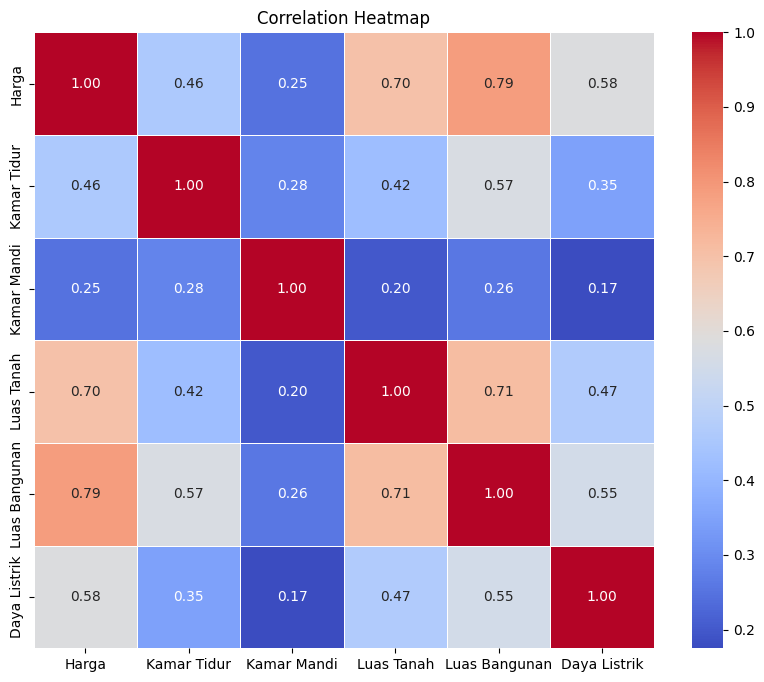

In [153]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

**Insight** : From the correlation maps, it conclude that column Luas Bangunan and Luas Tanah have a strong correlation with column Harga.

# Check correlation matrix

In [154]:
correlation_matrix = data.corr()
correlation_to_price = correlation_matrix['Harga']
# Print correlation values
print(correlation_to_price)

Harga            1.000000
Kamar Tidur      0.456476
Kamar Mandi      0.248452
Luas Tanah       0.698421
Luas Bangunan    0.785113
Daya Listrik     0.582957
Name: Harga, dtype: float64


**Insight** : Same like correlation maps, the results of correlation matrix also show that Luas Tanah and Luas Bangunan have a strong correlation with Harga